## Importing 'yfinance' and getting data

In [2]:
import yfinance as yf

In [3]:
df = yf.download('Apollo.ns')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-19,94.000000,101.000000,94.0,97.650002,97.650002,722226
2024-03-20,98.000000,99.900002,94.0,96.500000,96.500000,538628
2024-03-21,99.500000,99.500000,97.0,98.000000,98.000000,552349
2024-03-22,98.150002,102.900002,97.5,102.849998,102.849998,886637
2024-03-26,104.000000,105.500000,98.5,98.699997,98.699997,1280946


In [5]:
df.reset_index(inplace=True)

In [6]:
df.drop(columns=['Adj Close'],inplace=True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-01-22,46.500000,48.000000,44.174999,44.174999,10382040
1,2018-01-23,41.970001,41.970001,41.970001,41.970001,245980
2,2018-01-24,39.875000,39.875000,39.875000,39.875000,137650
3,2018-01-25,37.884998,37.884998,37.884998,37.884998,169900
4,2018-01-29,38.000000,39.439999,35.994999,36.174999,8274710


In [8]:
df.set_index('Date',inplace=True)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

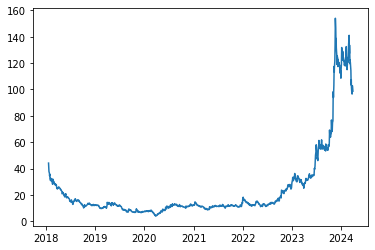

In [10]:
plt.plot(df.Close)
plt.show()

## Moving Average over a window of 100 periods

In [11]:
ma100 = df.Close.rolling(100).mean()

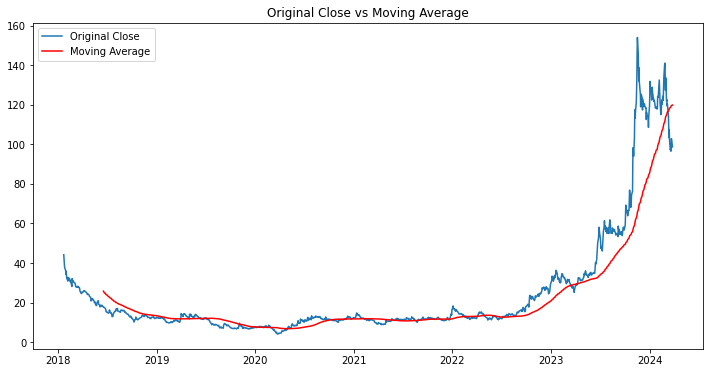

In [12]:
plt.figure(figsize=(12,6))
plt.title("Original Close vs Moving Average")
plt.plot(df.Close,label='Original Close')
plt.plot(ma100,'r',label='Moving Average')
plt.legend()
plt.show()

## Smoothening the data using Differencing

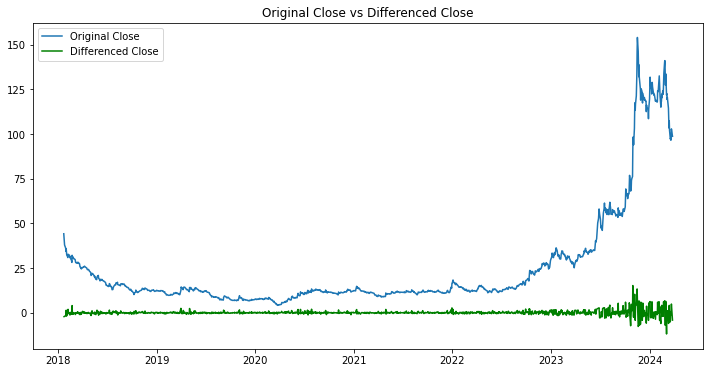

In [13]:
df['Close_diff'] = df['Close'].diff()
plt.figure(figsize=(12,6))
plt.title("Original Close vs Differenced Close")
plt.plot(df.Close,label='Original Close')
plt.plot(df.Close_diff,'g',label="Differenced Close")
plt.legend()
plt.show()

## Train test split

In [19]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

In [20]:
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [21]:
len(data_training)+len(data_testing) ==len(df)

True

## How many years of data is available

In [22]:
print(f"{df.index[-1].year - df.index[0].year} years of data is available")

6 years of data is available


## Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_arr = scaler.fit_transform(data_training)
data_training_arr

array([[1.        ],
       [0.94495074],
       [0.89264763],
       ...,
       [0.20047434],
       [0.20009987],
       [0.19111222]])

In [25]:
#time series analogy that a value for a particular day is dependent on the previous set of values, for that we took 100 set
#of previous values
import numpy as np
x_train = [] #100 days would become x_train that is feature, and next observations would be predictive class
y_train = []

for i in range(100,data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

## LSTM model with different layers and last one is a Dense layer

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu')) #last layer
model.add(Dropout(0.5))

model.add(Dense(units=1)) #colse column

C:\Users\rohit\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


x_train.shape[1],1 used 1 at last because we are predicting only single column that is close

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - loss: 0.0144
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - loss: 0.0034
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - loss: 0.0021
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - loss: 0.0017
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - loss: 0.0016
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - loss: 0.0020
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - loss: 0.0015
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - loss: 0.0013
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - loss: 0.0014
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - loss: 0.0013
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - loss: 0.0010
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - loss: 0.0010
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - loss: 0.0011
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step - loss: 0.0010
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - 

In [35]:
model.save('keras_model.h5')

In [36]:
model.save('my_model.keras')

## Making Predictions on Testing Data

In [37]:
data_testing.head()

,Close
Date,
2022-05-20,12.050
2022-05-23,11.885
2022-05-24,11.810
2022-05-25,11.265
2022-05-26,11.400


Merging past 100 records from training set to make predicitions according to that

In [42]:
past_100_days = data_training.tail(100)

In [43]:
final_df = past_100_days.append(data_testing)

In [53]:
final_df.head()

,Close
Date,
2021-12-23,11.985
2021-12-24,12.670
2021-12-27,14.320
2021-12-28,14.140
2021-12-29,13.715


In [54]:
input_data = scaler.fit_transform(final_df)

In [55]:
input_data

array([[5.91487691e-03],
       [1.07097840e-02],
       [2.22595503e-02],
       [2.09995801e-02],
       [1.80246382e-02],
       [3.68192586e-02],
       [3.72042531e-02],
       [5.01539968e-02],
       [4.32941372e-02],
       [4.03191886e-02],
       [4.16141590e-02],
       [3.94792129e-02],
       [3.86042304e-02],
       [3.33193286e-02],
       [3.43343115e-02],
       [3.17443641e-02],
       [3.70992594e-02],
       [3.35643293e-02],
       [3.13943698e-02],
       [3.00993927e-02],
       [2.99593990e-02],
       [2.87344222e-02],
       [2.34145270e-02],
       [2.17695623e-02],
       [2.14895681e-02],
       [2.28895388e-02],
       [2.24695509e-02],
       [2.15945684e-02],
       [2.32045330e-02],
       [2.25045444e-02],
       [2.23295505e-02],
       [1.85846265e-02],
       [1.60646793e-02],
       [1.91446148e-02],
       [1.87946204e-02],
       [1.63796668e-02],
       [1.16897668e-02],
       [1.34047317e-02],
       [1.42797142e-02],
       [1.09547780e-02],


In [57]:
input_data.shape

(558, 1)

In [58]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [60]:
print(x_test.shape)
print(y_test.shape)

(458, 100, 1)
(458,)


### Making Predictions

In [61]:
y_predicted = model.predict(x_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step


In [62]:
y_predicted.shape

(458, 1)

### Scaling up the values of y_predicted and y_test

In [63]:
scaler.scale_

array([0.00699986])

In [64]:
y_predicted = y_predicted/scaler.scale_
y_test = y_test/scaler.scale_

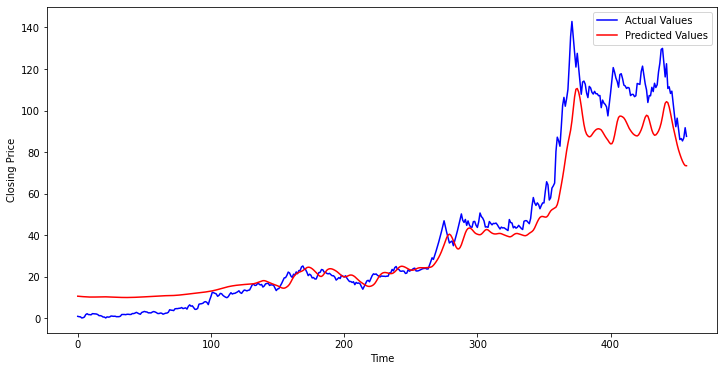

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Actual Values')
plt.plot(y_predicted,'r',label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()